# Question 1

Zahra Maleki
400110009

In [4]:
import numpy as np
import matplotlib.pyplot as plt

**NOTE**: You cannot use any ready-to-use functionalities from numpy or any other libraries to compute convolution or circular convolution or anything that we asked you to implement from scratch! Although, you can use numpy's `np.sin`, `np.cos` and these basic functions with ease of mind and no problem!

## Part a

Implement a function to calculate the convolution of 2 discrete time signals. Then, plot the convolution of `sin(x)` and `cos(x)` for `x` as range of numbers from `0` to `2pi` divided in `100` parts.

In [3]:
def convolution(signal1, signal2):
    # TODO: return the result of convolution of signal1 and signal2 (discrete-time)

    len1 = len(signal1)
    len2 = len(signal2)
    result = [0] * (len1 + len2 - 1)

    if len1 < len2:
        signal1 += [0] * (len2 - len1)
    elif len2 < len1:
        signal2 += [0] * (len1 - len2)

    for i in range(len(result)):
        for j in range(len(signal1)):
            if i - j >= 0 and i - j < len(signal2):
                result[i] += signal1[j] * signal2[i - j]

    return result

In [4]:
# a simple test (your function will be still checked for correct logic, other than this test)
convolution([1, 2, 3, 4], [1, 2, 3, 4])

[1, 4, 10, 20, 25, 24, 16]

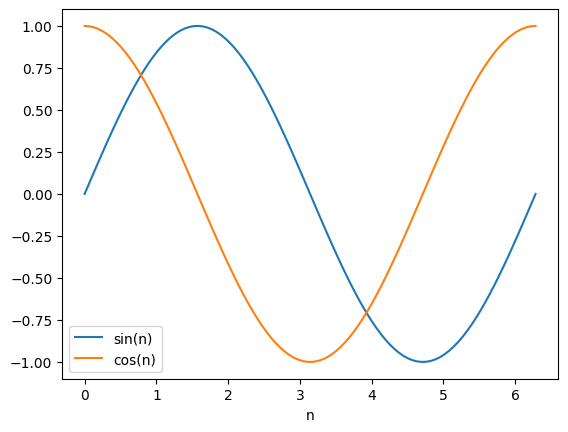

In [5]:
# TODO: convolve sin(x) and cos(x) over the range of 0 to 2*pi divided into 100 points
# and plot each function seperately, and the result of convolution also

n = np.linspace(0, 2*np.pi, 100)

signal1 = np.sin(n)
signal2 = np.cos(n)
conv = convolution(signal1, signal2)

plt.plot(n, signal1, label = "sin(n)")
plt.plot(n, signal2, label = "cos(n)")

plt.xlabel('n')
plt.legend()

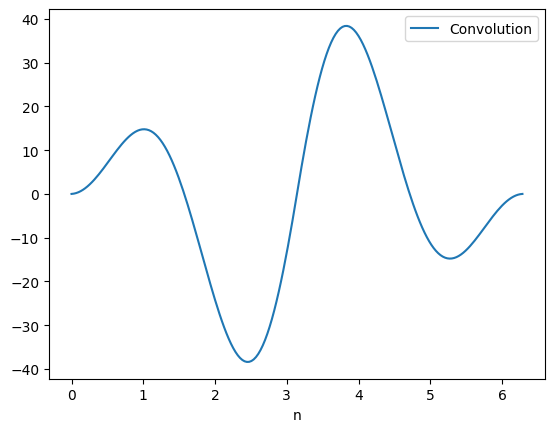

In [6]:
nc = np.linspace(0, 2*np.pi, len(conv))
plt.plot(nc, conv, label = 'Convolution')
plt.xlabel('n')
plt.legend()

In [5]:
def circconv(x, y, N):
    # TODO: return the result of circular convolution of x and y (discrete-time)
    # among with analysis width = N

    convcir = [0] * N

    for i in range(N):
        a = 0
        for k in range(N):
            a += x[k] * y[(i - k) % N]
        convcir[i] = a
    return convcir

In [6]:
# TODO: circular convolve sin(x) and cos(x) over the range of 0 to 2*pi divided into 100 points
# and plot each function seperately, and the result of circular convolution also

convcir = circconv(signal1, signal2, 100)

plt.plot(n, signal1, label = "sin(n)")
plt.plot(n, signal2, label = "cos(n)")

plt.xlabel('n')
plt.legend()

NameError: name 'signal1' is not defined

In [7]:
plt.plot(n, convcir, label = 'Circukar Convolution')
plt.xlabel('n')
plt.legend()


NameError: name 'n' is not defined

# Question 2

In this question, you should implement DCT from scratch (**without using any ready-to-use functionalities for this sake from numpy or other libraries**). Then, you should find basis images of DCT. We will use this basises to compress an image. To compress a given image, you should compute DCT of each block of the image, sort the DCT coefficients and keep the `n` largest coefficients. Then, reconstruct the compressed image and see how well DCT compressed your image and how lossy is this compression! Let's go.

**NOTE**: You **should not** use any ready-to-use functionalities for DCT from numpy or other libraries. You should implement DCT from scratch. you can use numpy for other functionalities like `np.cos`, `np.pi`, etc.

In [20]:
def mse_calculation(img, img_quantized):
    """Calculate the mean square error between two images.

    Parameters
    ----------
    img : array_like
        The original image.
    img_quantized : array_like
        The quantized image.

    Returns
    -------
    mse : float
        The mean square error between the two images.
    """
    # TODO
  

    mse = np.mean((img - img_quantized) ** 2)
    return mse


In [9]:
def compute_dct_basis(N):
   """
   This function, takes an integer N as input and returns a set of N^2 basis images,
   each of size (N, N). The basis images should be computed using the formula for the DCT basis functions.
   """
   # TODO

   basis = np.zeros((N, N, N, N))

   for u in range(N):
      for v in range(N):
         for i in range(N):
             for j in range(N):
                  basis[u, v, i, j] = np.cos(((2*u+1) *i* np.pi) / (2*N))    *     np.cos(((2*v + 1) *j* np.pi) / (2*N)) 

   return basis


In [10]:
compute_dct_basis(8).shape

(8, 8, 8, 8)

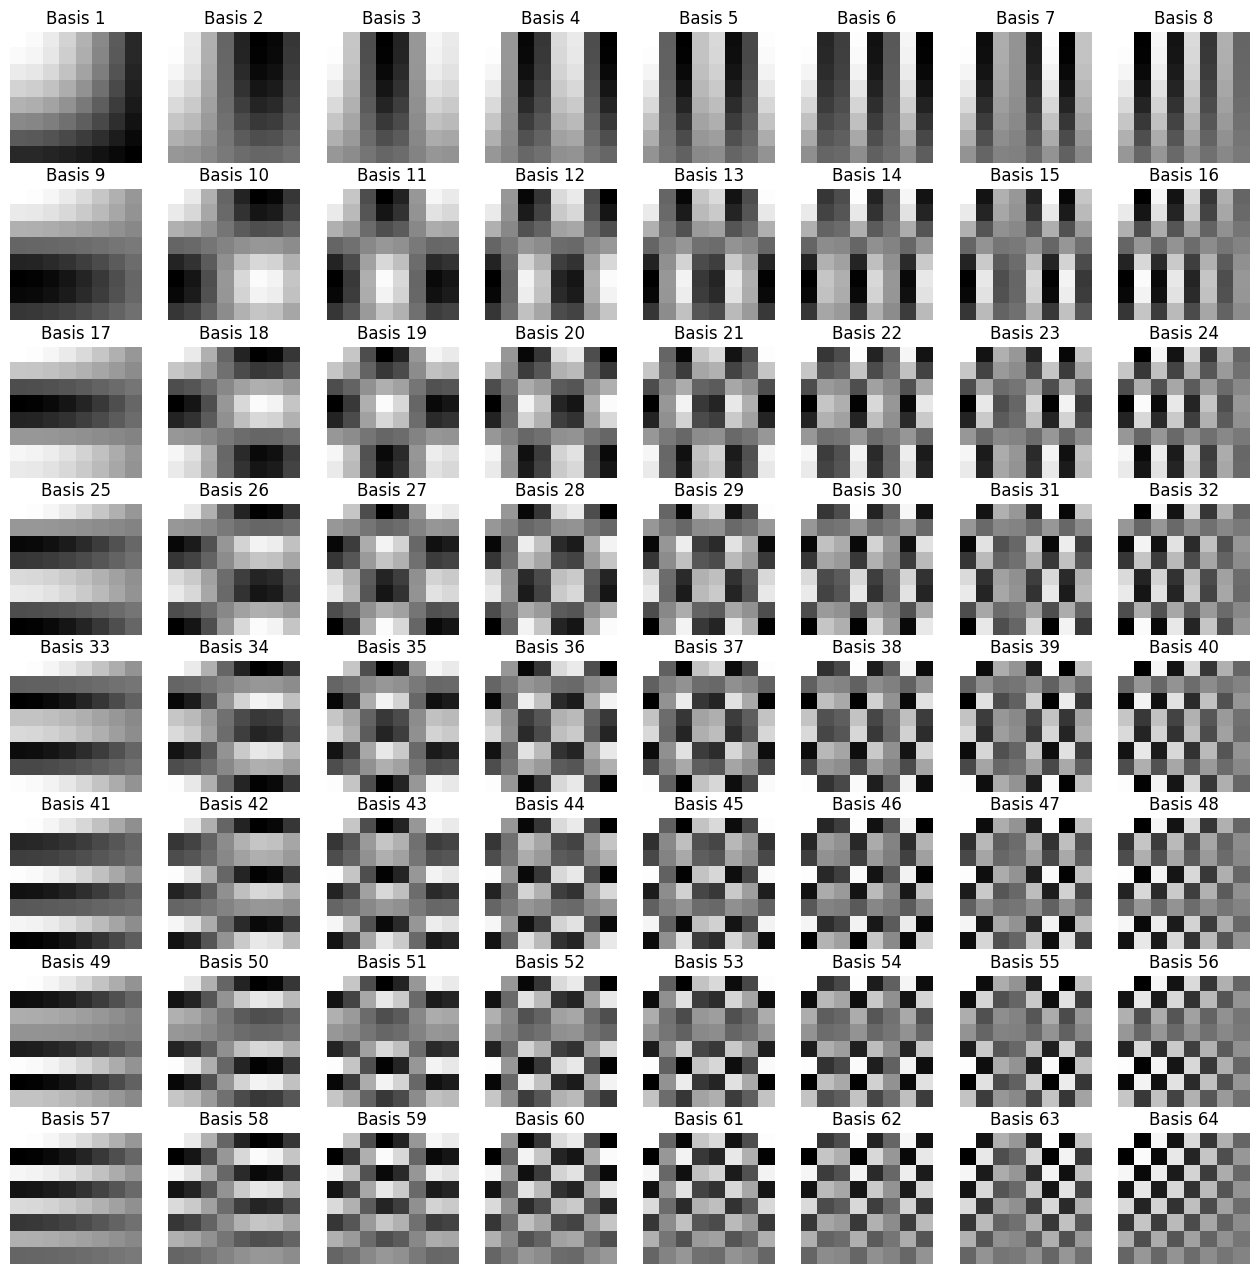

In [29]:
basis_images = compute_dct_basis(8)

# TODO: plot the first 64 basis images

basis = compute_dct_basis(8)

plt.figure(figsize=(16, 16))
for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        plt.imshow(basis[i, j], cmap='gray')
        plt.axis('off')
        plt.title(f"Basis {i * 8 + j + 1}")
    

In [11]:
def compress_and_decompress_image(image, basis_images, n):

    """
    This function takes an image and a set of basis images and an integer n as input.
    It first, compresses the image by projecting it onto the first n basis images.
    (keeping n largest coefficients) and then reconstructs the image from the compressed image.
    """

    N = image.shape[0] // 8
    compressed_image = np.zeros_like(image)
    decompressed_image = np.zeros_like(image)

    for i in range(N):
        for j in range(N):
            block = image[i * 8: (i+1) * 8, j * 8: (j+1) * 8]
            dct_block = np.zeros_like(block)

           
            for u in range(8):
                for v in range(8):
                    for x in range(8):
                        for y in range(8):
                            dct_block[u, v] += block[x, y] * basis_images[u, v, x, y]

            
            sorted_indices = np.argsort(np.abs(dct_block), axis=None)
            compressed_block = np.zeros_like(dct_block)
            compressed_block[np.unravel_index(sorted_indices[-n:], dct_block.shape)] = dct_block[np.unravel_index(sorted_indices[-n:], dct_block.shape)]

            
            reconstructed_block = np.zeros_like(block)
            for u in range(8):
                for v in range(8):
                    for x in range(8):
                        for y in range(8):
                            reconstructed_block[x, y] += compressed_block[u, v] * basis_images[u, v, x, y]

            
            compressed_image[i * 8: (i+1) * 8, j * 8: (j+1) * 8] = compressed_block
            decompressed_image[i * 8: (i+1) * 8, j * 8: (j+1) * 8] = reconstructed_block

    return compressed_image, decompressed_image

In [36]:
def psnr(img, img_compressed):
    """Compute the peak signal-to-noise ratio (PSNR) between two images.

    Parameters
    ----------
    img : ndarray
        The original image.
    img_compressed : ndarray
        The compressed image.

    Returns
    -------
    psnr : float
        The peak signal-to-noise ratio between the two images.
    """
    #TODO
  
    mse = mse_calculation(img, img_compressed)
   
    max_pixel_value = np.max(np.array(img))
   
    A = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    
    return A
    


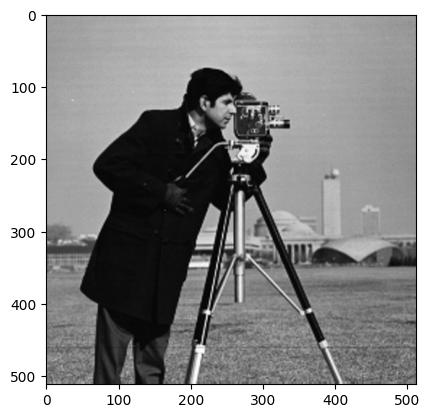

In [13]:
img = plt.imread("./cameraman.png")

plt.imshow(img, cmap="gray")


In [15]:
basis = compute_dct_basis(8)
n_values = [1, 10, 20, 30, 40, 50]

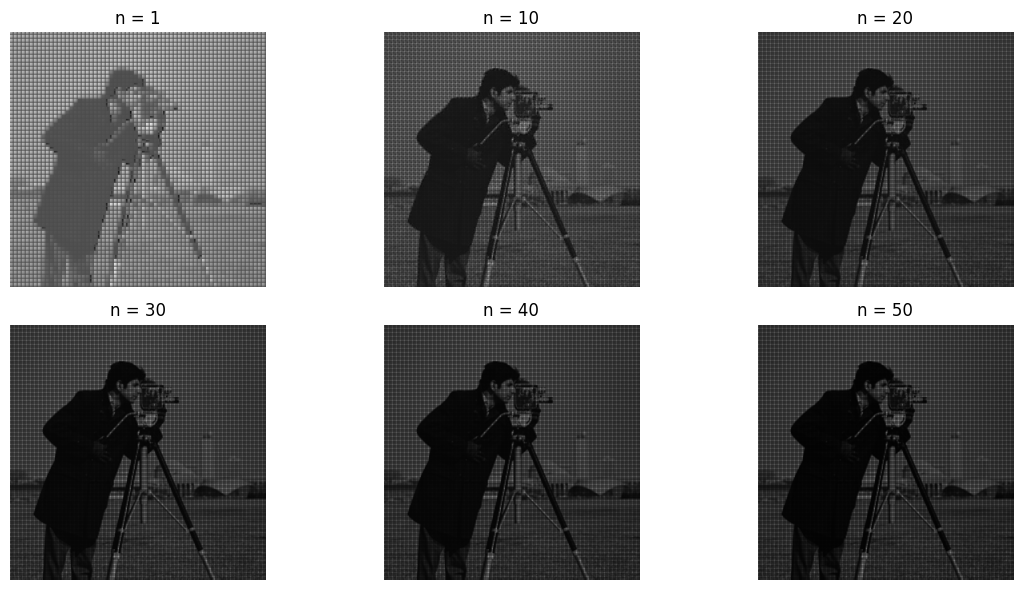

In [33]:
# Compress the given image using your function "compress_and_decompress_image"
# and plot the reconstructed images for n = 1, 10, 20, 30, 40, 50
# TODO

basis = compute_dct_basis(8)
n_values = [1, 10, 20, 30, 40, 50]

fig, axes = plt.subplots(2, 3, figsize=(6*2, 6))

for i, n in enumerate(n_values):
    compressed_coefficients, reconstructed_image = compress_and_decompress_image(img, basis, n)
    row_idx = i // 3
    col_idx = i % 3
    axes[row_idx, col_idx].imshow(reconstructed_image, cmap='gray')
    axes[row_idx, col_idx].set_title(f'n = {n}')
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()

In [27]:
# Compute the MSE between the input image and the output image for each value of n.
# Plot the MSE as a function of n.

#TODO
my_reconstructed_image = compress_and_decompress_image(img, basis, 50)


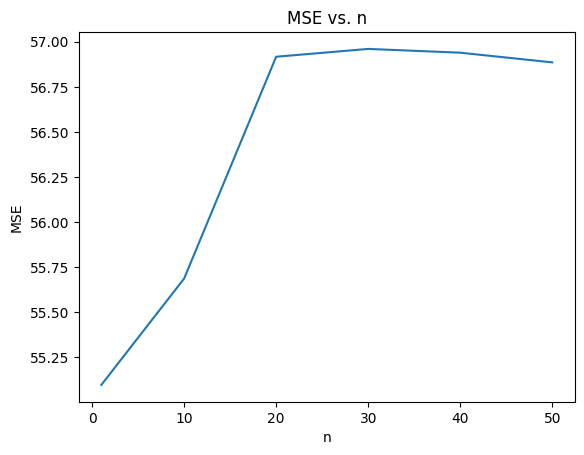

In [40]:
mse_values = []
psnr_values = [0]*6
i=0
for n in n_values:
    compressed_coefficients, reconstructed_image = compress_and_decompress_image(img, basis, n)
    mse = mse_calculation(my_reconstructed_image, reconstructed_image)
    mse_values.append(mse)

plt.plot(n_values, mse_values)
plt.xlabel('n')
plt.ylabel('MSE')

plt.show()

In [41]:
# Compute the PSNR between the input image and the output image for each value of n.
# Plot the PSNR as a function of n.

#TODO
mse_values = []
psnr_values = [0]*6
i=0
for n in n_values:
    compressed_coefficients, reconstructed_image = compress_and_decompress_image(img, basis, n)
    mse = mse_calculation(my_reconstructed_image, reconstructed_image)
    mse_values.append(mse)
    psnr_val = psnr(my_reconstructed_image, reconstructed_image)
    psnr_values[i] = psnr_val
    i = i+ 1

    
plt.plot(n_values, psnr_values)
plt.xlabel('n')
plt.ylabel('PSNR (dB)')
plt.show()

TypeError: 'numpy.float64' object is not callable